In [7]:
!pip install --upgrade --force-reinstall xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [8]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /Users/aditijain/opt/anaconda3/lib/python3.7/site-packages (1.0.4)


In [131]:
from statistics import mean 

In [1]:
import pandas as pd

In [11]:
validation = pd.read_excel('QA_from_val.xlsx')
validation.head()

,Unnamed: 0,Logeq,Mutex,Necc,answer,qid,question
0,0,is this dude using knife to cut the cake?,is this dude using a hammer to cut the cake?,is there any cake in the picture?,knife,340069003,This bored dude is using what instrument to cu...
1,3,is a city bus pictured?,is the type of bus pictured a tourist bus?,is there a bus pictured?,city bus,188817001,What type of bus is pictured?
2,8,are there logs on the ground behind the giraffe?,is there spoon laying on the ground behind the...,is there a giraffe?,logs,573778003,What is laying on the ground behind the giraffe?
3,10,is the horse brown?,is the horse black?,is there a horse?,brown,405135001,What color is the horse?
4,11,is the surfboard green?,is the surfboard yellow?,is there a surfboard?,green,187362006,What color is the surfboard?


In [12]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10321 non-null  object
 1   Logeq       10321 non-null  object
 2   Mutex       10321 non-null  object
 3   Necc        10321 non-null  object
 4   answer      10321 non-null  object
 5   qid         10321 non-null  int64 
 6   question    10321 non-null  object
dtypes: int64(1), object(6)
memory usage: 564.6+ KB


In [90]:
import pandas_profiling
#pandas_profiling.ProfileReport(validation)

In [38]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditijain/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/aditijain/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/aditijain/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

# Length wise comparison

25.71814746633078

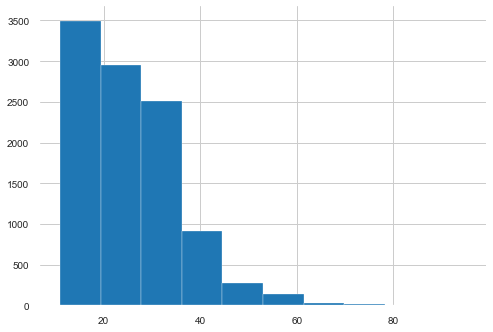

In [132]:
validation['Necc'].str.len().hist(label='necc')
mean(validation['Necc'].str.len())

30.2792365080903

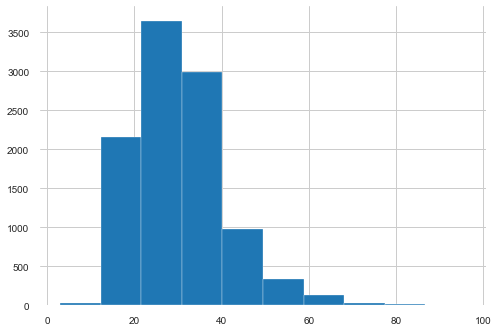

In [133]:
validation['Mutex'].str.len().hist()
mean(validation['Mutex'].str.len())

30.36188353841682

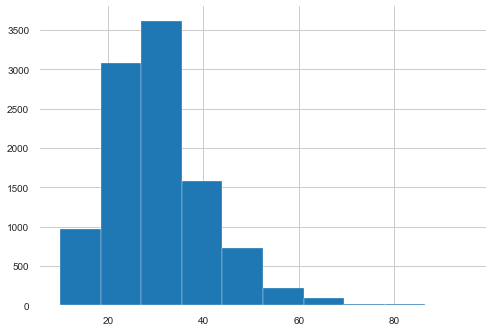

In [134]:
validation['Logeq'].str.len().hist(label='logeq')
mean(validation['Logeq'].str.len())

31.630365274682685

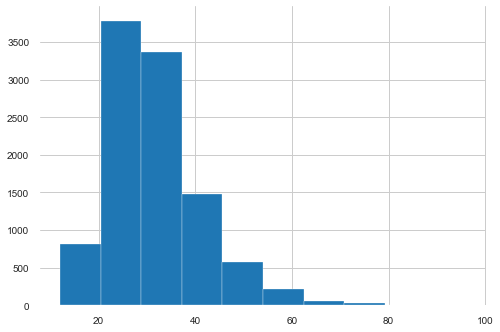

In [135]:
validation['question'].str.len().hist(label='question')
mean(validation['question'].str.len())

# Tokenizing and tagging question category-wise

In [17]:
text_ans= validation.iloc[:,4]
print(text_ans)

0             knife
1          city bus
2              logs
3             brown
4             green
            ...    
10316    microphone
10317          bike
10318      backpack
10319             4
10320      backpack
Name: answer, Length: 10321, dtype: object


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [20]:
#text_ans = text_ans.fillna('').apply(str)
#text_ans = text_ans.fillna('NaN').apply(str)
text_ans = text_ans.apply(str)


In [85]:
tokenizer = Tokenizer(oov_token="<OOV>") # Your Code Here
tokenizer.fit_on_texts(text_ans)
word_index1 = tokenizer.word_index
print(len(word_index1))


1581


# POS Tag List

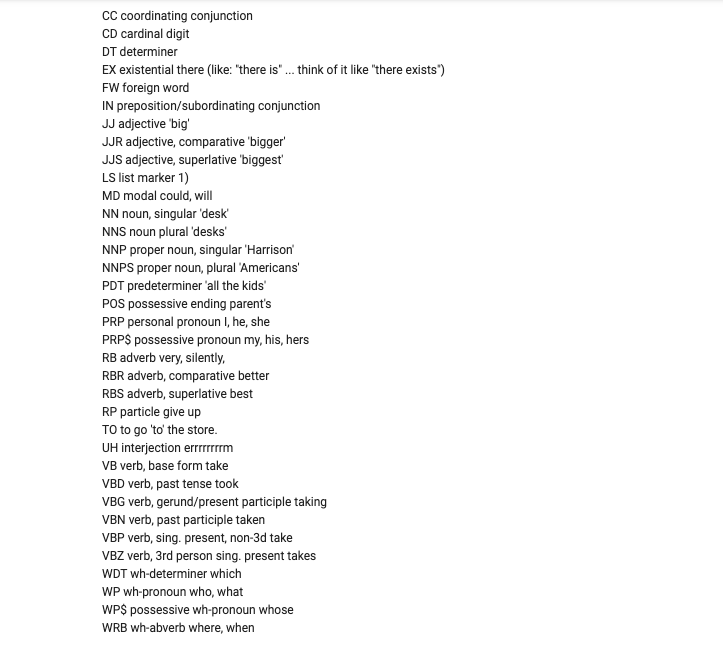

# answer

In [100]:
list_ans_tag= nltk.pos_tag(word_index1)

In [161]:
ans_pos=pd.DataFrame(list_ans_tag,columns=['word','POS'])
ans_pos.head(15)

,word,POS
0,<OOV>,RB
1,2,CD
2,1,CD
3,white,JJ
4,black,JJ
5,red,JJ
6,3,CD
7,blue,JJ
8,brown,VBN
9,green,JJ


In [79]:
#pandas_profiling.ProfileReport(ans_pos)

NN      678
JJ      258
NNS     192
VBP     104
VBG     102
CD       74
RB       37
VBD      37
VBZ      31
IN       24
JJR      10
VBN       8
VB        6
DT        3
RBR       3
RP        3
PRP       3
CC        2
MD        1
TO        1
WP        1
PRP$      1
JJS       1
FW        1
Name: POS, dtype: int64
verb forms 288
integers 74


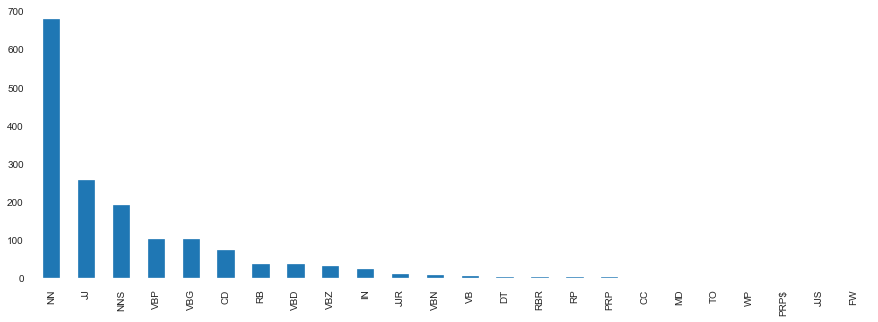

In [156]:

count1 = ans_pos['POS'].value_counts()  
count1.plot(kind='bar',figsize=(15,5))
print(count1)
print("verb forms",104+102+37+31+14)
print("integers",74)

# question

In [86]:

text_que= validation.iloc[:,6]
text_que = text_que.apply(str)
tokenizer2 = Tokenizer(oov_token="<OOV>") # Your Code Here
tokenizer2.fit_on_texts(text_que)
word_index2 = tokenizer2.word_index
print(len(word_index2))


2751


In [160]:
que_pos=pd.DataFrame(nltk.pos_tag(word_index2),columns=['word','POS'])
que_pos.head(15)

,word,POS
0,<OOV>,VB
1,the,DT
2,what,WP
3,is,VBZ
4,are,VBP
5,how,WRB
6,of,IN
7,many,JJ
8,color,NN
9,on,IN


NN      862
NNS     475
JJ      432
VBG     230
VBP     195
VBD     122
RB       85
VBZ      71
VBN      68
IN       60
VB       33
JJR      21
DT       18
CD       17
JJS      12
PRP       9
MD        7
PRP$      5
RBR       5
CC        4
RP        4
WRB       4
WP        4
FW        3
WP$       1
WDT       1
TO        1
EX        1
RBS       1
Name: POS, dtype: int64
verb forms 719
integers 17
adjectives 465


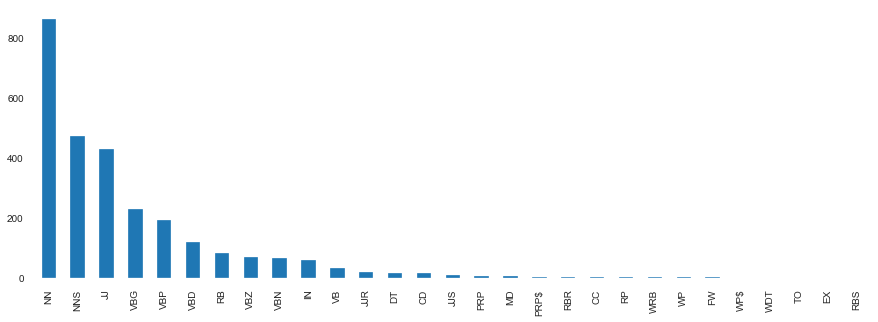

In [164]:
count2 = que_pos['POS'].value_counts()  
count2.plot(kind='bar',figsize=(15,5))
print(count2)
print("verb forms",230+195+122+71+68+33)
print("integers",17)
print("adjectives", 432+21+12)
print("wh question", )

# Logeq

In [88]:

text_logeq= validation.iloc[:,1]
text_logeq = text_logeq.apply(str)
tokenizer3 = Tokenizer(oov_token="<OOV>") # Your Code Here
tokenizer3.fit_on_texts(text_logeq)
word_index3 = tokenizer3.word_index
print(len(word_index3))


3433


In [159]:
logeq_pos=pd.DataFrame(nltk.pos_tag(word_index3),columns=['word','POS'])
logeq_pos.head(15)

,word,POS
0,<OOV>,IN
1,the,DT
2,is,VBZ
3,are,VBP
4,a,DT
5,there,RB
6,on,IN
7,in,IN
8,this,DT
9,of,IN


NN      1160
JJ       543
NNS      534
VBP      269
VBG      256
VBD      133
RB        98
CD        85
VBN       71
IN        70
VBZ       67
VB        39
JJR       23
JJS       17
DT        14
PRP       12
CC         9
MD         8
PRP$       5
FW         3
WRB        3
$          2
RBR        2
WP         2
NNP        2
RP         2
WDT        1
WP$        1
POS        1
TO         1
Name: POS, dtype: int64
verb forms 835
integers 85
adjectives 583


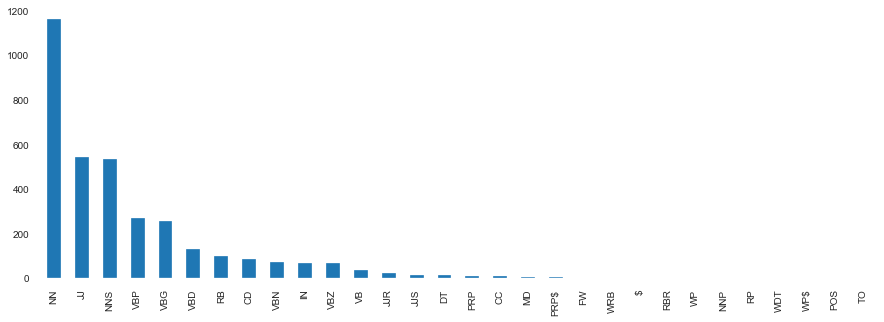

In [167]:
count3 = logeq_pos['POS'].value_counts()  
count3.plot(kind='bar',figsize=(15,5))
print(count3)
print("verb forms",269+256+133+71+67+39)
print("integers", 85)
print("adjectives",543+23+17)

# Necc

In [91]:

text_necc= validation.iloc[:,3]
text_necc = text_necc.apply(str)
tokenizer4 = Tokenizer(oov_token="<OOV>") # Your Code Here
tokenizer4.fit_on_texts(text_necc)
word_index4 = tokenizer4.word_index
print(len(word_index4))


2588


In [158]:
necc_pos=pd.DataFrame(nltk.pos_tag(word_index4),columns=['word','POS'])
necc_pos.head(15)

,word,POS
0,<OOV>,NN
1,is,VBZ
2,there,RB
3,a,DT
4,the,DT
5,are,VBP
6,this,DT
7,any,DT
8,in,IN
9,on,IN


NN      856
NNS     449
JJ      414
VBG     209
VBP     201
VBD     107
RB       65
VBN      57
VBZ      51
IN       47
VB       25
CD       23
DT       15
JJR      13
MD        8
RBR       7
PRP       7
JJS       7
CC        5
PRP$      5
RP        4
WRB       3
WP        3
NNP       2
RBS       2
WDT       1
TO        1
FW        1
Name: POS, dtype: int64
verb forms 650
integers 23
adjectives 434


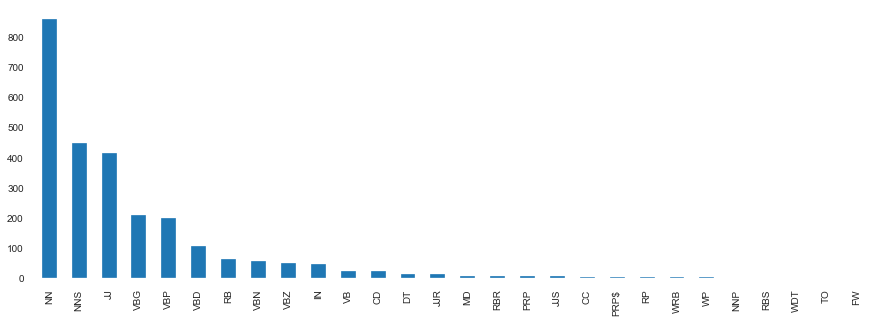

In [166]:
count4 = necc_pos['POS'].value_counts()  
count4.plot(kind='bar',figsize=(15,5))
print(count4)
print("verb forms",201+107+209+57+51+25)
print("integers",23)
print("adjectives",414+7+13)

# Mutex

In [92]:

text_mut= validation.iloc[:,2]
text_mut = text_mut.apply(str)
tokenizer5 = Tokenizer(oov_token="<OOV>") # Your Code Here
tokenizer5.fit_on_texts(text_mut)
word_index5 = tokenizer5.word_index
print(len(word_index5))


3809


In [157]:
mut_pos=pd.DataFrame(nltk.pos_tag(word_index5),columns=['word','POS'])
mut_pos.head(15)

,word,POS
0,<OOV>,IN
1,the,DT
2,is,VBZ
3,are,VBP
4,a,DT
5,there,RB
6,on,IN
7,in,IN
8,this,DT
9,of,IN


NN      1370
JJ       612
NNS      581
VBG      279
VBP      257
VBD      131
CD       112
RB       106
VBZ       81
VBN       70
IN        66
VB        30
JJR       24
JJS       15
DT        14
PRP       11
CC         8
FW         8
MD         7
RBR        6
PRP$       5
WRB        4
NNP        3
WDT        2
WP         2
WP$        1
PDT        1
POS        1
RP         1
TO         1
Name: POS, dtype: int64
verb_forms 848
integers 112
adjectives 651


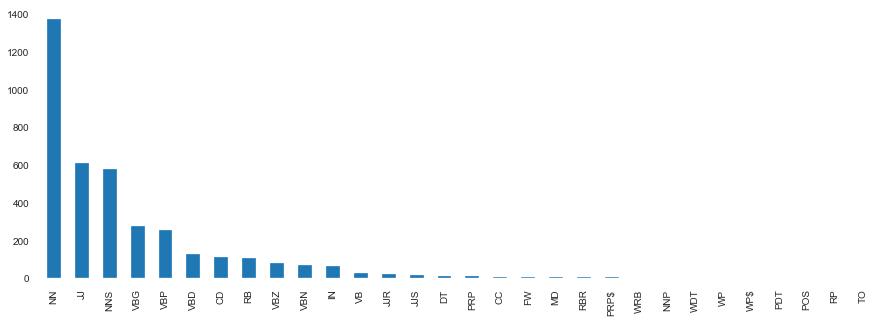

In [165]:
count5 = mut_pos['POS'].value_counts()  
print(count5)
count5.plot(kind='bar',figsize=(15,5))
print('verb_forms',848)
print("integers",112)
print("adjectives", 612+24+15)

Observations from the above data
1. Avg Length of necc questions is shorter than the others(25.7 in necc, 30.3 in mutex and logeq and 31.6 in question)
2. No of cardinal digits(CD) in Necc questions is only 23 and only 17 in question as compared to 112 in mutex and 85 in logeq.
3. No of verb forms in necc are 650 whereas 848 in mutex, 835 in logeq and 719 in question
4. No of adjectives in necc are 434 whereas there are 583 in logeq, 465 in question and 651 in mutex.
5. 15 of the most frequently occuring words from all columns (question, answer, mutex, logeq and necc) are also shown in tables.
